# Метрики регрессии

В задаче **регрессии** мы используем входные **признаки**, чтобы предсказать **целевые значения**, являющиеся вещественными числами. Например, можно предсказывать цену жилья по его характеристикам (площадь, этаж, год постройки дома, высота потолков, район, ...).

В нашем примере будем использовать уже знакомый алгоритм k-NN, но для регресии. Работает он следующим образом:
1. Запоминаем объекты обучающей выборки.
2. Для нового объекта ищем $k$ ближайших соседей.
3. Предсказание для нового объекта — **это среднее значение целевой переменной $k$ ближайших соседей**.


Сгенерируем данные для демонстрации:

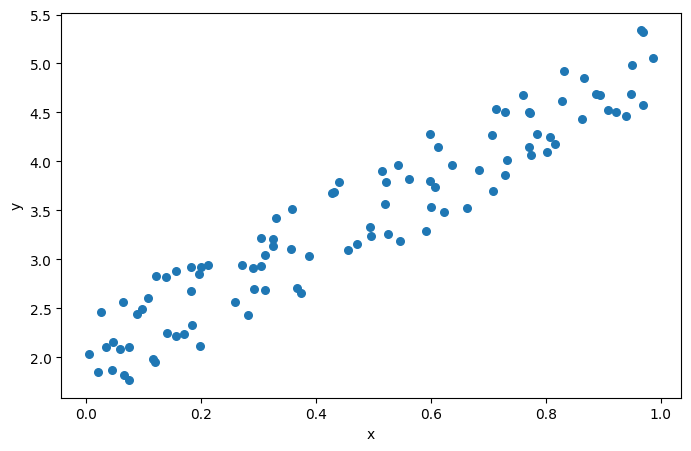

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(42)
x = np.random.rand(100, 1)
y = 2 + 3 * x + (np.random.rand(100, 1) - 0.5)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=30)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Сделаем разделение на выборки:

In [ ]:
from sklearn.model_selection import train_test_split

# Split data to train and val
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

print("Train:", np.array(x_train).shape, np.array(y_train).shape)
print("Val:", np.array(x_val).shape, np.array(y_val).shape)
print("Total:", np.array(x).shape, np.array(y).shape)

Train: (80, 1) (80, 1)
Val: (20, 1) (20, 1)
Total: (100, 1) (100, 1)


Обучим `KNeighborsRegressor` [🛠️[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) и сделаем предсказание на отложенной выборке:

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(x_train, y_train)
y_pred = knn_regressor.predict(x_val)
print(f"predicted: {y_pred}")

predicted: [[3.57571878]
 [5.23612644]
 [3.60959585]
 [4.38365959]
 [3.59897112]
 [2.58737568]
 [3.83046542]
 [4.1714615 ]
 [4.1714615 ]
 [4.84391852]
 [4.35110955]
 [3.37171184]
 [2.19747243]
 [3.60959585]
 [2.6357678 ]
 [3.48809083]
 [2.54706058]
 [2.04915387]
 [2.28800407]
 [5.11369912]]


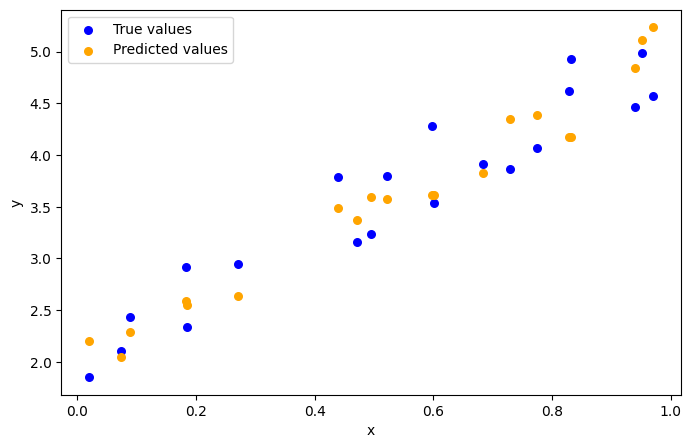

In [ ]:
# Plot true vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(x_val, y_val, color="blue", label="True values", s=30)
plt.scatter(x_val, y_pred, color="orange", label="Predicted values", s=30)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## MAE (mean absolute error)

Чтобы оценить качество модели, посчитаем среднюю абсолютную ошибку $\text{MAE}$:

$$\large \text{MAE} = \frac{1}{N} \sum |y_i - f(x_i)|$$

In [ ]:
mae = np.mean(np.abs(y_val - y_pred))

print(f"Mean Absolute Error: {mae:.3f}")

Mean Absolute Error: 0.326


Изобразим, как выглядит ошибка графически:

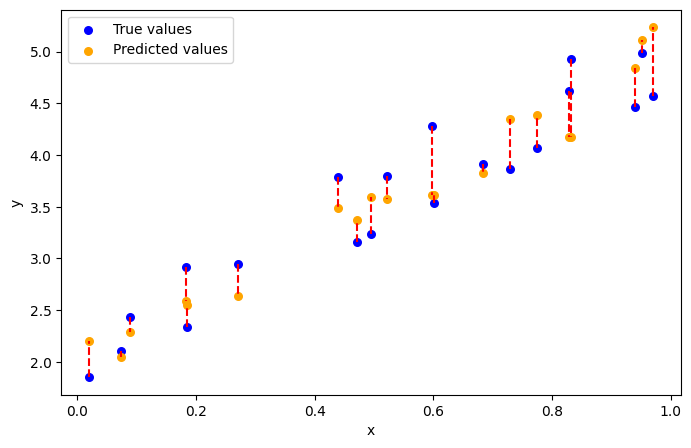

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(x_val, y_val, color="blue", label="True values", s=30)
plt.scatter(x_val, y_pred, color="orange", label="Predicted values", s=30)
for i in range(len(x_val)):
    plt.plot([x_val[i], x_val[i]], [y_val[i], y_pred[i]], "r--")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

$\text{MAE}$ показывает, на сколько в среднем наши предсказания отличаются от реальных значений по модулю.

**Когда применять:** $\text{MAE}$ полезна, когда нам важны простота и интерпретируемость. Она одинаково наказывает все ошибки, без сильного акцента на большие ошибки.




В `sklearn.metrics` есть много удобных инструментов для работы с метриками:

In [ ]:
from sklearn.metrics import mean_absolute_error

print(f"Mean absolute error: {mean_absolute_error(y_val, y_pred):.3f}")

Mean absolute error: 0.326


## MSE (mean squared error)

Следующая метрика — $\text{MSE}$. Она измеряет среднее значение квадратов ошибок. Из-за возведения ошибок в квадрат большие ошибки наказываются сильнее.

$$\large \text{MSE}  = \frac{1}{N} \sum \left(y_i - f(x_i)\right)^2$$

In [ ]:
from sklearn.metrics import mean_squared_error

print(f"mean_squared_error: {mean_squared_error(y_val, y_pred):.3f}")

mean_squared_error: 0.145


**Когда применять:** $\text{MSE}$ полезна, когда нам важно минимизировать крупные ошибки.

## RMSE (root mean squared error)

Чтобы получить оценку ошибки в размерности целевой переменной, можно взять корень (root) от $\text{MSE}$. Это метрика $\text{RMSE}$:

$$\large \text{RMSE} = \sqrt{\frac{1}{N} \sum \left(y_i - f(x_i)\right)^2}$$




In [ ]:
from sklearn.metrics import root_mean_squared_error

print(f"root_mean_squared_error: {root_mean_squared_error(y_val, y_pred):.3f}")

root_mean_squared_error: 0.380


**Когда применять:** $\text{RMSE}$ часто используют в тех же случаях, что и $\text{MSE}$, но она более интерпретируема, так как результат находится в тех же единицах измерения, что и данные.

## R²

Существуют и более специфичные метрики, например, $R^2$, которая принимает значения из $(-\infty, 1]$, где $1$  —  наилучший вариант. $R^2$ называется [коэффициентом детерминации 📚[wiki]](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8) и характеризует долю дисперсии целевого значения, которую объясняет модель.

$$\large R^2 = 1 - \frac{\text{MSE}}{\sigma_y^2}=1 - \frac{\sum {\left(y_i-f(x_i)\right)^2}}{\sum{\left(y_i-\bar{y}\right)^2}},$$

$$\large \bar{y} = \frac{1}{N}\sum {y_i},$$

где $\sigma_y^2$ — дисперсия целевой переменной.

In [ ]:
from sklearn.metrics import r2_score

print(f"R2 score: {r2_score(y_val, y_pred):.3f}")

R2 score: 0.828


**Интуиция:** $R^2$ показывает качество модели в сравнении со случайным предсказателем.

**Когда применять:** $R^2$  полезен для оценки общей способности модели объяснять вариацию в данных. Также удобен для сравнения разных моделей.


## MSLE (mean squared logarithmic error)

В некоторых задачах регрессии ошибки могут иметь разные последствия в зависимости от того, перепредсказали мы или недопредсказали значение. В таких случаях лучше использовать несимметричные метрики, которые учитывают, что одни ошибки хуже других.

Например, мы предсказываем количество лекарств на скаладе больницы. Если мы перепредскажем их количество, то останутся излишки, которые могут испортиться. Если мы недопредскажем, то пострадают пациенты. В такой ситуации недопредсказание более критично.

$$\large \text{MSLE}  = \frac{1}{N} \sum \left(\ln \left(1+y_i\right) - \ln \left(1+f(x_i)\right)\right)^2$$

In [ ]:
from sklearn.metrics import mean_squared_log_error

y_true = np.array([10, 20, 30, 40, 50])

y_pred1 = np.array([15, 25, 35, 45, 55])  # overprediction
y_pred2 = np.array([5, 15, 25, 35, 45])  # underprediction

print(
    f"mean_squared_log_error overprediction: {mean_squared_log_error(y_true, y_pred1):.3f}"
)
print(
    f"mean_squared_log_error underprediction: {mean_squared_log_error(y_true, y_pred2):.3f}"
)

mean_squared_log_error overprediction: 0.046
mean_squared_log_error underprediction: 0.100


Подробнее про метрики можно почитать [тут 📚[book]](https://academy.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii). Там же вы можете найти информацию об относительных ошибках, выражаемых в процентах. Выбор метрики в реальной задаче зависит от традиции, сложившейся в области, поэтому для выбора метрик важно провести литературный обзор.
